# Plot a single flight co-located using VISION

In [1]:
# IMPORT LIBRARIES
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.mlab as mlab
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,LatitudeLocator, LongitudeLocator)
import os
import cf
import numpy as np
import numpy.ma as ma
from datetime import datetime

#################################
# Colour scales, colour-blind-friendly for map or line plotting (from https://colorbrewer2.org/)
# Diverging colour scales (11 colours)
# blue to red; green to magenta
blue_to_red = ['#a50026','#d73027','#f46d43','#fdae61','#fee090','#ffffff','#e0f3f8','#abd9e9','#74add1','#4575b4','#313695']
green_to_magenta=['#276419','#4d9221','#7fbc41','#b8e186','#e6f5d0','#ffffff','#fde0ef','#f1b6da','#de77ae','#c51b7d','#8e0152']
# Sequential colour scales (9 colours)
y2r=['#ffffff','#ffffcc','#ffeda0','#fed976','#feb24c','#fd8d3c','#fc4e2a','#e31a1c','#bd0026','#800026']
#################################
# Values in colour bar
lin_lev=[1,2,3,4,5,6,7,8,9]
#################################

In [2]:
# SELECT OPTIONS HERE
outdir='/home/vagrant/Plots/'

In [3]:
# READ AND PROCESS FAAM DATA

# Define variables for FAAM data
source1='FAAM'
infile1='/home/vagrant/Tutorials/UMvn13.9/data/Task16/VISION_input/Obs/core_faam_20140704_b860_MAGIC.nc'
slabel1='FAAM O3 '
vunits1=' (ppbv)'
vfactor1=1.
vmin1=3. # removes negative values and very low values collected during taxiing
vscale1=y2r 
vlevs1=[x*10 for x in lin_lev]

# Read and concatenate data
rdata1=cf.read(infile1)
rdata1=rdata1.concatenate()

# Create label (for plot title) and filename (for output)
plot_title1 = source1

outfile1=outdir+source1

# Apply conversion factors
rdata1.data=rdata1.data * vfactor1
# Remove values below a set minimum
if vmin1 is not None:
    rdata1=rdata1.where(rdata1.array <= vmin1, cf.masked)

# Extract coordinates
lat = rdata1.coordinate('latitude').array
lon = rdata1.coordinate('longitude').array
alt1 = rdata1.coordinate('altitude').array
time1 = rdata1.coordinate('time').array
# Extract data
obs = rdata1.array

/home/ubuntu/.conda/envs/ukca/lib/python3.12/site-packages/matplotlib/cbook.py:1719: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


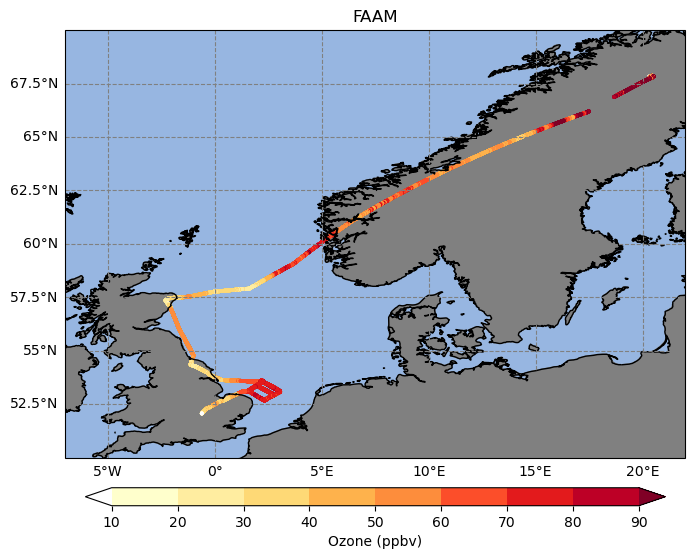

In [4]:
# PLOT MAP OF FAAM OZONE

# Define figure and size
fig = plt.figure(figsize=(8, 12))
# Define Axes (ax1) and choose cartopy projection for map 
# See here for more projections: https://earth-env-data-science.github.io/lectures/mapping_cartopy.html
ax1 = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
# Add cartopy features
ax1.add_feature(cartopy.feature.OCEAN)
ax1.add_feature(cartopy.feature.LAND, color='grey')    # optional: edgecolor='black'
# Or add stock image
#ax1.stock_img()
# Add coastlines
ax1.coastlines(resolution='10m')  # coastline resolution options are '110m', '50m', '10m'
# Define region to plot as [lon1,lon2,lat1,lat2] (default=global plot)
ax1.set_extent([-7,22,50,70], crs=ccrs.PlateCarree())

# Set title for the plot
ax1.set_title(plot_title1)
# Plot gridlines and grid labels (choose color and style of gridlines)
gl=ax1.gridlines(draw_labels=True,color='grey',linestyle='--')
gl.top_labels = False
gl.right_labels = False
 
# Set levels and choose color scale
mylev=vlevs1
clrmap = matplotlib.colors.ListedColormap(vscale1)
# get discrete colormap
norm = matplotlib.colors.BoundaryNorm(mylev, clrmap.N, extend='both')

# Add data
ax1.scatter(lon, lat, c=obs, norm=norm,cmap=clrmap, s=3 )
# Get position/size of plot and work out position/size of colorbar relative to plot
pos1 = ax1.get_position()
pos2 = [pos1.x0 + 0.025, pos1.y0 - 0.04,  pos1.width -0.025*2, 0.015]

#add colorbar as a separate axes
ax2 = fig.add_axes(pos2)
cb2 = matplotlib.colorbar.ColorbarBase(ax2, cmap=clrmap,norm=norm,orientation='horizontal')

cb2.set_label('Ozone' + vunits1)

plt.savefig(outfile1+'_1day_map.png',dpi=300,bbox_inches='tight')


In [5]:
# READ AND PROCESS UKCA DATA (COLOCATED ON FAAM FLIGHT TRACKS USING VISION)

# Define variables for UKCA data
source2='UKESM'
infile2='/home/vagrant/VISION_output/cra_ukca_colocated_to_faam_b860.nc'
slabel2='UKESM O3 '
vunits2=' (ppbv)'
vmin2=None
vfactor2=1.e9/1.657 # converts UKCA data (kg/kg) to ppbv 
vscale2=y2r
vlevs2=[x*10 for x in lin_lev]

# Read and concatenate data
rdata2=cf.read(infile2)
rdata2=rdata2.concatenate()

# Create label (for plot title) and filename (for output)
plot_title2 = source2

outfile2=outdir+source2

# If subsetting dataset update plot_title and filename accordingly

# Apply conversion factors
rdata2.data=rdata2.data * vfactor2
# Remove values below a set minimum
if vmin2 is not None:
    rdata2=rdata2.where(rdata2.array <= vmin2, cf.masked)

# Extract coordinates
lat = rdata2.coordinate('latitude').array
lon = rdata2.coordinate('longitude').array
alt2 = rdata2.coordinate('altitude').array
time2 = rdata2.coordinate('time').array
# Extract data
mod = rdata2.array

/home/ubuntu/.conda/envs/ukca/lib/python3.12/site-packages/matplotlib/cbook.py:1719: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


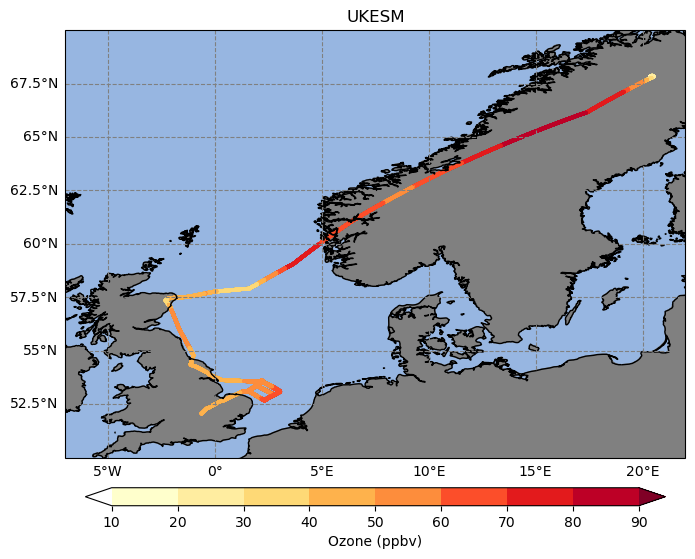

In [6]:
# PLOT MAP OF UKCA OZONE

# Define figure and size
fig = plt.figure(figsize=(8, 12))
# Define Axes (ax1) and choose cartopy projection for map 
# See here for more projections: https://earth-env-data-science.github.io/lectures/mapping_cartopy.html
ax1 = plt.axes(projection=ccrs.PlateCarree(central_longitude=0))
# Add cartopy features
ax1.add_feature(cartopy.feature.OCEAN)
ax1.add_feature(cartopy.feature.LAND, color='grey')    # optional: edgecolor='black'

# Add coastlines
ax1.coastlines(resolution='10m')  # coastline resolution options are '110m', '50m', '10m'
# Define region to plot as [lon1,lon2,lat1,lat2] (default=global plot)
ax1.set_extent([-7,22,50,70], crs=ccrs.PlateCarree())
# Set title for the plot
ax1.set_title(plot_title2)
# Plot gridlines and grid labels (choose color and style of gridlines)
gl=ax1.gridlines(draw_labels=True,color='grey',linestyle='--')
gl.top_labels = False
gl.right_labels = False
 
# Set levels and choose color scale
mylev=vlevs2
clrmap = matplotlib.colors.ListedColormap(vscale2)
# get discrete colormap
norm = matplotlib.colors.BoundaryNorm(mylev, clrmap.N, extend='both')

# Add data
ax1.scatter(lon, lat, c=mod, norm=norm,cmap=clrmap, s=3 )
# Get position/size of plot and work out position/size of colorbar relative to plot
pos1 = ax1.get_position()
pos2 = [pos1.x0 + 0.025, pos1.y0 - 0.04,  pos1.width -0.025*2, 0.015]

#add colorbar as a separate axes
ax2 = fig.add_axes(pos2)
cb2 = matplotlib.colorbar.ColorbarBase(ax2, cmap=clrmap,norm=norm,orientation='horizontal')

cb2.set_label('Ozone' + vunits1)

plt.savefig(outfile2+'1day_map.png',dpi=300,bbox_inches='tight')


/home/ubuntu/.conda/envs/ukca/lib/python3.12/site-packages/matplotlib/cbook.py:1719: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)
/tmp/ipykernel_178238/2198917196.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc="upper right", title=source1)
/tmp/ipykernel_178238/2198917196.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc="upper right", title=source2)


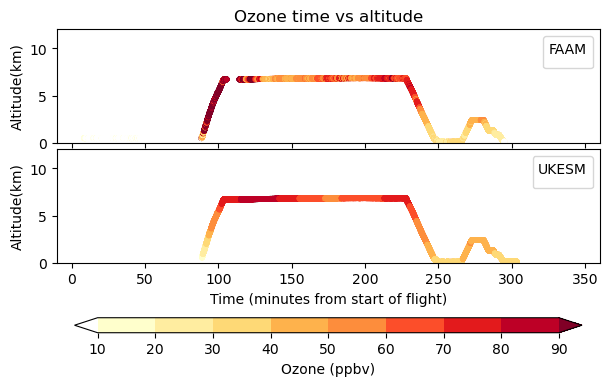

In [7]:
# Define figure and size
fig = plt.figure(figsize=(7, 5))

# Define Axes 
ax1=fig.add_subplot(3, 1, 1)
ax2=fig.add_subplot(3, 1, 2)
ax3=fig.add_subplot(3, 1, 3)

ax1.scatter((time1-time1[0])*24*60, alt1/1000., c=obs, norm=norm,cmap=clrmap, s=10 )
ax1.set_xlim(-10,360)
ax1.set_ylim(0,12)
ax1.legend(loc="upper right", title=source1)
ax1.set_title('Ozone time vs altitude')
#ax1.set_xlabel('Time (seconds from start of flight)')
ax1.set_ylabel('Altitude(km)')
pos1 = ax1.get_position()

# Find position for second plot
pos2 = [pos1.x0, pos1.y0 - 0.24, pos1.width, pos1.height] 
ax2.set_position(pos2)

# Add second plot
ax2.scatter((time2-time2[0])*24*60, alt2/1000., c=mod, norm=norm,cmap=clrmap, s=10 )
ax2.set_xlim(-10,360)
ax2.set_ylim(0,12)
ax2.legend(loc="upper right", title=source2)
ax2.set_xlabel('Time (minutes from start of flight)')
ax2.set_ylabel('Altitude(km)')

pos2 = ax2.get_position()

#add colorbar for second plot
pos3 = [pos2.x0 + 0.025, pos2.y0 - 0.14,  pos2.width -0.025*2, 0.03] 
ax3.set_position(pos3)
cb = matplotlib.colorbar.ColorbarBase(ax3, cmap=clrmap,
      norm=norm, orientation='horizontal')
cb.set_label('Ozone (ppbv)')